In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillagePotato",
    shuffle=True,
    image_size = (IMAGE_SIZE , IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)   

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

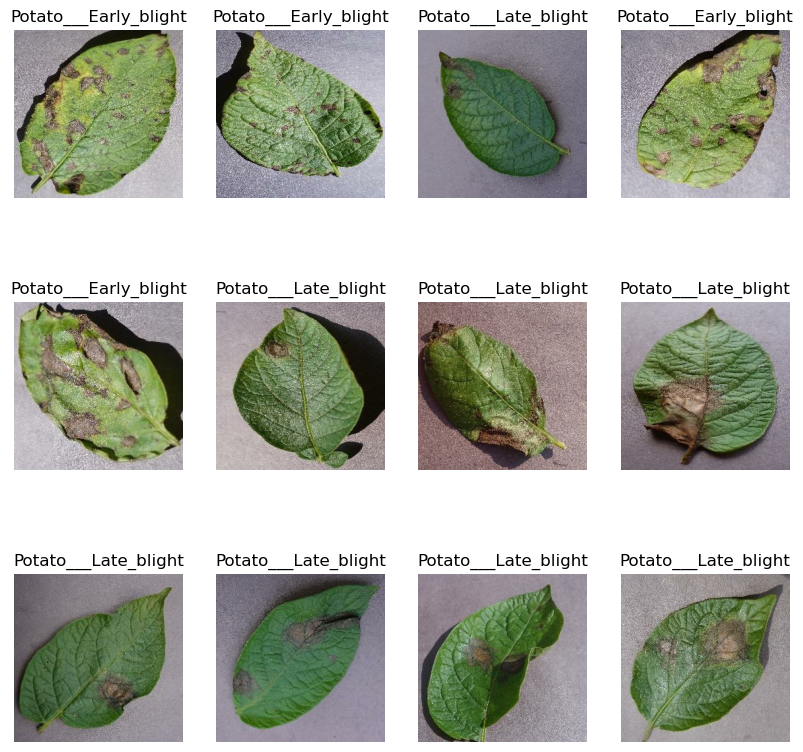

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [7]:
len(dataset)

68

In [10]:
80% ==> training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (829920516.py, line 1)

In [9]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [11]:
train_ds = dataset.take(54)
len(train_ds)


54

In [12]:
test_ds = dataset.skip(54) 
len(test_ds)

14

In [13]:
val_size = 0.1
len(dataset)*val_size


6.800000000000001

In [14]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [15]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [16]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000 ):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [17]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [18]:
len(train_ds)

54

In [19]:
len(val_ds)


6

In [20]:
len(test_ds)

8

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
tets_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential ([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3


model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']

)

In [27]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size= BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 85s 1s/step - loss: 0.9134 - accuracy: 0.4740 - val_loss: 0.8391 - val_accuracy: 0.4635
Epoch 2/50
54/54 [==============================] - 73s 1s/step - loss: 0.8551 - accuracy: 0.5214 - val_loss: 0.7228 - val_accuracy: 0.5990
Epoch 3/50
54/54 [==============================] - 73s 1s/step - loss: 0.5972 - accuracy: 0.7373 - val_loss: 0.4259 - val_accuracy: 0.8438
Epoch 4/50
54/54 [==============================] - 74s 1s/step - loss: 0.3593 - accuracy: 0.8455 - val_loss: 0.2350 - val_accuracy: 0.8854
Epoch 5/50
54/54 [==============================] - 75s 1s/step - loss: 0.3460 - accuracy: 0.8623 - val_loss: 0.2407 - val_accuracy: 0.9167
Epoch 6/50
54/54 [==============================] - 75s 1s/step - loss: 0.2440 - accuracy: 0.8993 - val_loss: 0.2223 - val_accuracy: 0.9010
Epoch 7/50
54/54 [==============================] - 75s 1s/step - loss: 0.2001 - accuracy: 0.9265 - val_loss: 0.1449 - val_accuracy: 0.9323
Epoch 8/50
54/54 [==

Epoch 42/50
54/54 [==============================] - 72s 1s/step - loss: 0.0308 - accuracy: 0.9902 - val_loss: 0.1147 - val_accuracy: 0.9583
Epoch 43/50
54/54 [==============================] - 72s 1s/step - loss: 0.0399 - accuracy: 0.9873 - val_loss: 0.0469 - val_accuracy: 0.9792
Epoch 44/50
54/54 [==============================] - 73s 1s/step - loss: 0.0264 - accuracy: 0.9913 - val_loss: 0.0718 - val_accuracy: 0.9792
Epoch 45/50
54/54 [==============================] - 73s 1s/step - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.0462 - val_accuracy: 0.9792
Epoch 46/50
54/54 [==============================] - 74s 1s/step - loss: 0.0128 - accuracy: 0.9948 - val_loss: 0.0516 - val_accuracy: 0.9792
Epoch 47/50
54/54 [==============================] - 75s 1s/step - loss: 0.0114 - accuracy: 0.9948 - val_loss: 0.0558 - val_accuracy: 0.9792
Epoch 48/50
54/54 [==============================] - 76s 1s/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0136 - val_accuracy: 0.9948
Epoch 49/50
5

In [28]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 4s 288ms/step - loss: 0.1310 - accuracy: 0.9609


In [29]:
scores

[0.13097909092903137, 0.9609375]

In [30]:
history


In [31]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
history.history['accuracy']

[0.4739583432674408,
 0.5214120149612427,
 0.7372685074806213,
 0.8454861044883728,
 0.8622685074806213,
 0.8993055820465088,
 0.9265046119689941,
 0.9398148059844971,
 0.9456018805503845,
 0.9369212985038757,
 0.9699074029922485,
 0.9646990895271301,
 0.9560185074806213,
 0.9577546119689941,
 0.9797453880310059,
 0.9710648059844971,
 0.9618055820465088,
 0.9722222089767456,
 0.9861111044883728,
 0.9791666865348816,
 0.9872685074806213,
 0.9924768805503845,
 0.9704861044883728,
 0.9826388955116272,
 0.9849537014961243,
 0.9791666865348816,
 0.9525462985038757,
 0.9809027910232544,
 0.9884259104728699,
 0.9936342835426331,
 0.9930555820465088,
 0.9930555820465088,
 0.9936342835426331,
 0.9936342835426331,
 0.9947916865348816,
 0.9878472089767456,
 0.9959490895271301,
 0.9791666865348816,
 0.9924768805503845,
 0.9942129850387573,
 0.9959490895271301,
 0.9901620149612427,
 0.9872685074806213,
 0.9913194179534912,
 0.9890046119689941,
 0.9947916865348816,
 0.9947916865348816,
 0.9988425970

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

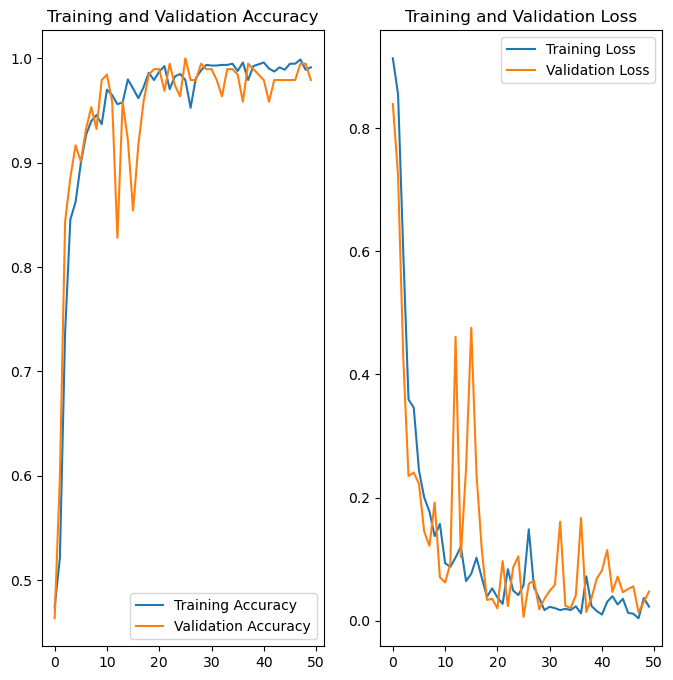

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


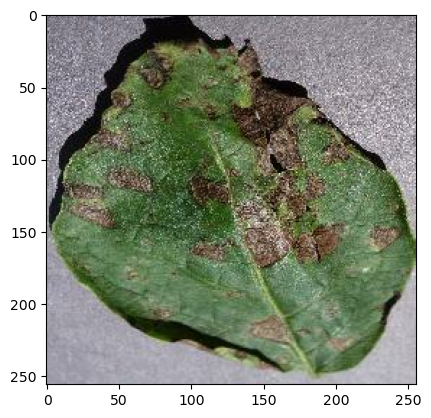

In [36]:
for images_batch, labels_batch in test_ds.take(1):
    
    plt.imshow(images_batch[0].numpy().astype('uint8'))

In [39]:
np.argmax([7.3838096e-09, 1.0000000e+00, 2.9183080e-13])

1

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 385ms/step
predicted label: Potato___Early_blight


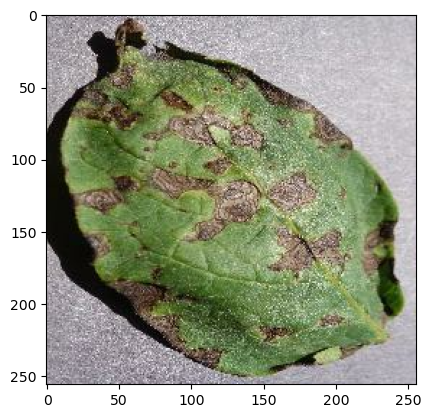

In [38]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])
    

In [41]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #Create a batch
    
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 [==============================] - 0s 21ms/step


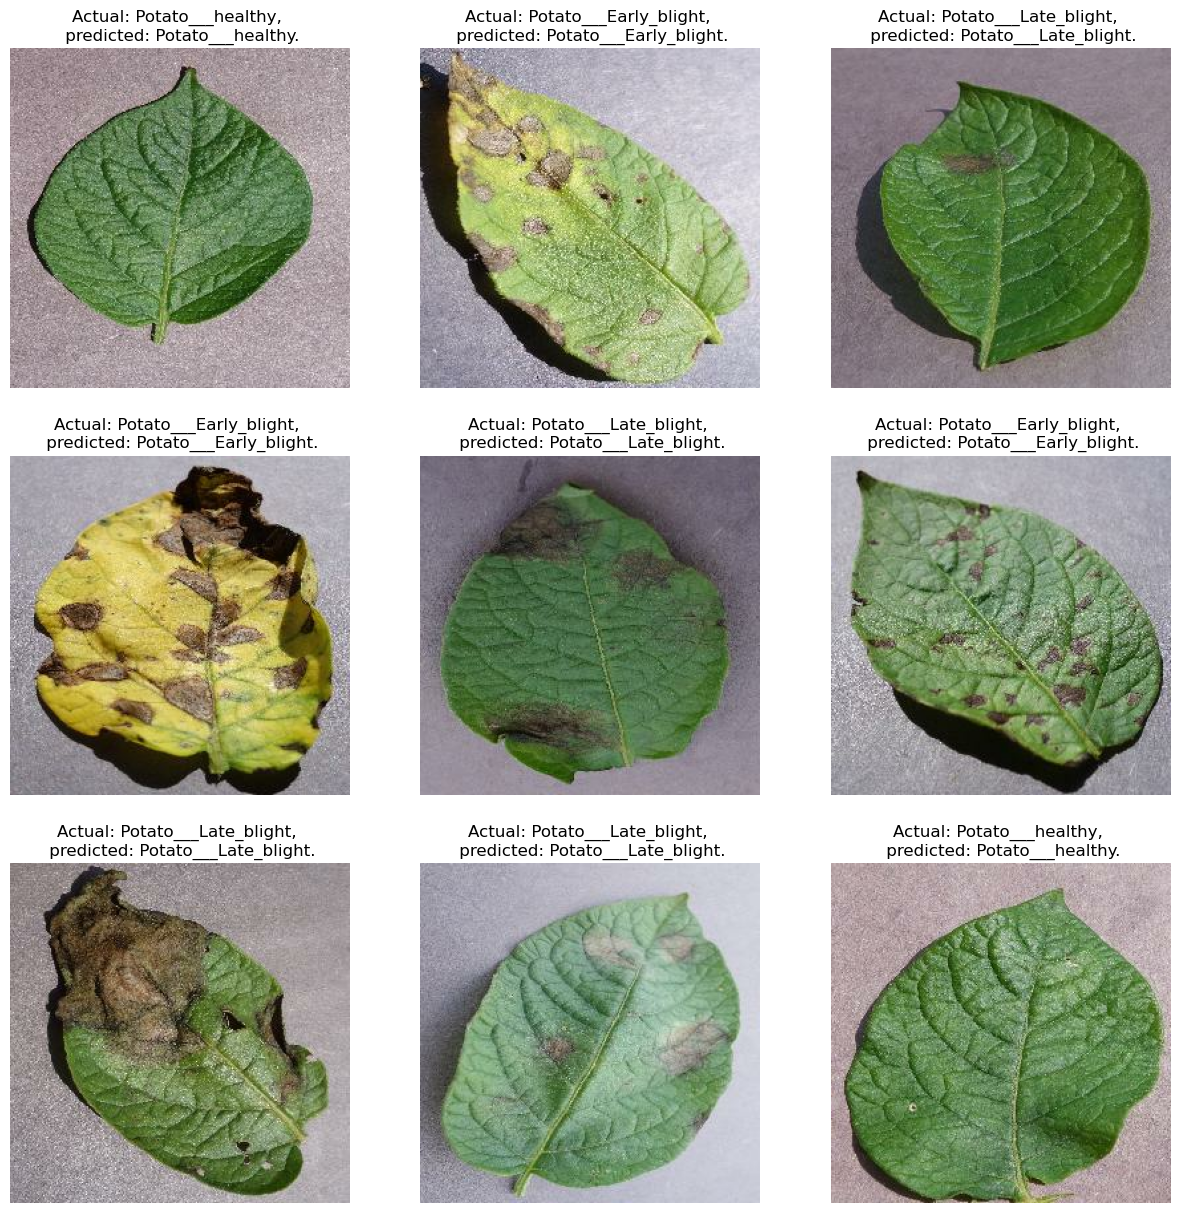

In [42]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n predicted: {predicted_class}.")
        
        plt.axis("off")
        

In [43]:
import os
model_version = max([int(i)for i in os.listdir("../models") + [0]])+1

model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


In [44]:
from platform import python_version

print(python_version())


3.9.13
